# **Load and Inspect the Data**

In [1]:
import pandas as pd

# Load datasets
potato = pd.read_excel("Potato_Cleaned.xlsx")
onion = pd.read_excel("Onion_cleaned.xlsx")
tomato = pd.read_excel("Tomato_Cleaned.xlsx")

# Show first few rows
print(potato.head())
print(onion.head())
print(tomato.head())


   ahmedabad_wholesaleprice  ahmedabad_retailprice  ahmedabad_volume  \
0                       815                   2450             22231   
1                       576                   2000             17116   
2                       348                   1550             22966   
3                       318                   1473              7729   
4                       381                   1463              8255   

   ahmedabad_avg._temperature  bengaluru_wholesaleprice  \
0                        20.1                      1758   
1                        22.8                      1569   
2                        27.1                      1246   
3                        31.2                      1153   
4                        33.4                      1004   

   bengaluru_retailprice  bengaluru_volume  bengaluru_avg._temperature  \
0                   2770             32806                        20.8   
1                   2592             21241                      

# **Standardize Column Names**

In [2]:
# Standardize column names
for df in [potato, onion, tomato]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# **Check Data Types and Missing Values**

In [3]:
# Check data types and missing values
for name, df in zip(['Potato', 'Onion', 'Tomato'], [potato, onion, tomato]):
    print(f"--- {name} Dataset ---")
    print(df.info())
    print(df.isnull().sum())

--- Potato Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ahmedabad_wholesaleprice       67 non-null     int64         
 1   ahmedabad_retailprice          67 non-null     int64         
 2   ahmedabad_volume               67 non-null     int64         
 3   ahmedabad_avg._temperature     67 non-null     float64       
 4   bengaluru_wholesaleprice       67 non-null     int64         
 5   bengaluru_retailprice          67 non-null     int64         
 6   bengaluru_volume               67 non-null     int64         
 7   bengaluru_avg._temperature     67 non-null     float64       
 8   bhubaneshwar_wholesaleprice    67 non-null     int64         
 9   bhubaneshwar_retailprice       67 non-null     int64         
 10  bhubaneshwar_volume            67 non-null     int64         
 11

# **Convert date Column to Datetime**

In [4]:
for df in [potato, onion, tomato]:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# **Descriptive Statistics**

In [5]:
# Summary stats
print(potato.describe())
print(onion.describe())
print(tomato.describe())

       ahmedabad_wholesaleprice  ahmedabad_retailprice  ahmedabad_volume  \
count                 67.000000              67.000000         67.000000   
mean                 601.537313            1736.582090      14197.522388   
min                  318.000000            1396.000000       1286.000000   
25%                  413.000000            1500.000000       7992.000000   
50%                  545.000000            1650.000000      11959.000000   
75%                  808.000000            1969.000000      22704.000000   
max                 1105.000000            2450.000000      23617.000000   
std                  238.043816             303.995023       8270.256132   

       ahmedabad_avg._temperature  bengaluru_wholesaleprice  \
count                   67.000000                 67.000000   
mean                    27.352239               1333.373134   
min                     20.100000                786.000000   
25%                     23.650000               1049.000000   


# **Time Range and Frequency Check**

In [6]:
for name, df in zip(['Potato', 'Onion', 'Tomato'], [potato, onion, tomato]):
    print(f"{name} Date Range: {df['date'].min()} to {df['date'].max()}")
    print(f"{name} Records: {df.shape[0]}")

Potato Date Range: 2015-01-01 00:00:00 to 2020-07-01 00:00:00
Potato Records: 67
Onion Date Range: 2015-01-01 00:00:00 to 2020-07-01 00:00:00
Onion Records: 67
Tomato Date Range: 2015-01-01 00:00:00 to 2020-07-01 00:00:00
Tomato Records: 77


# **Correlation Between Markets**

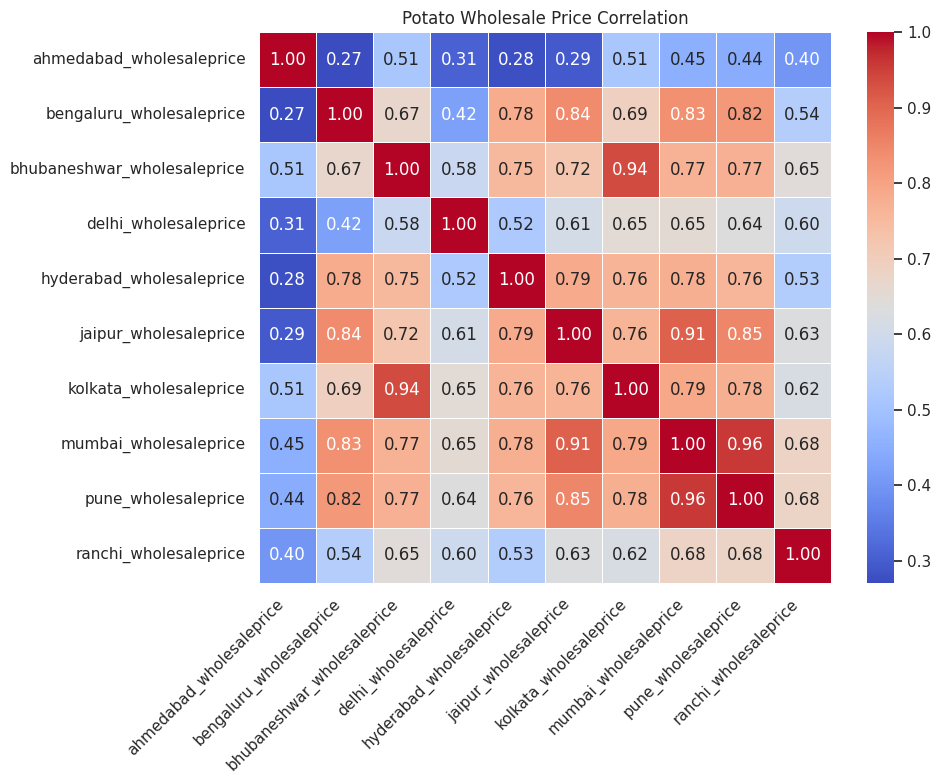

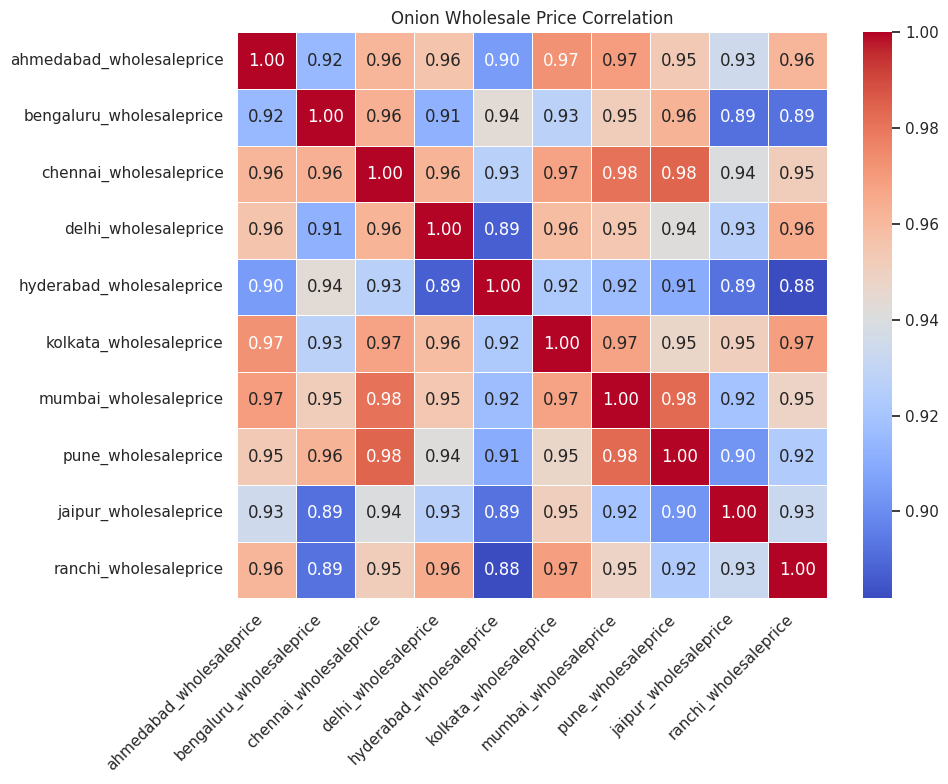

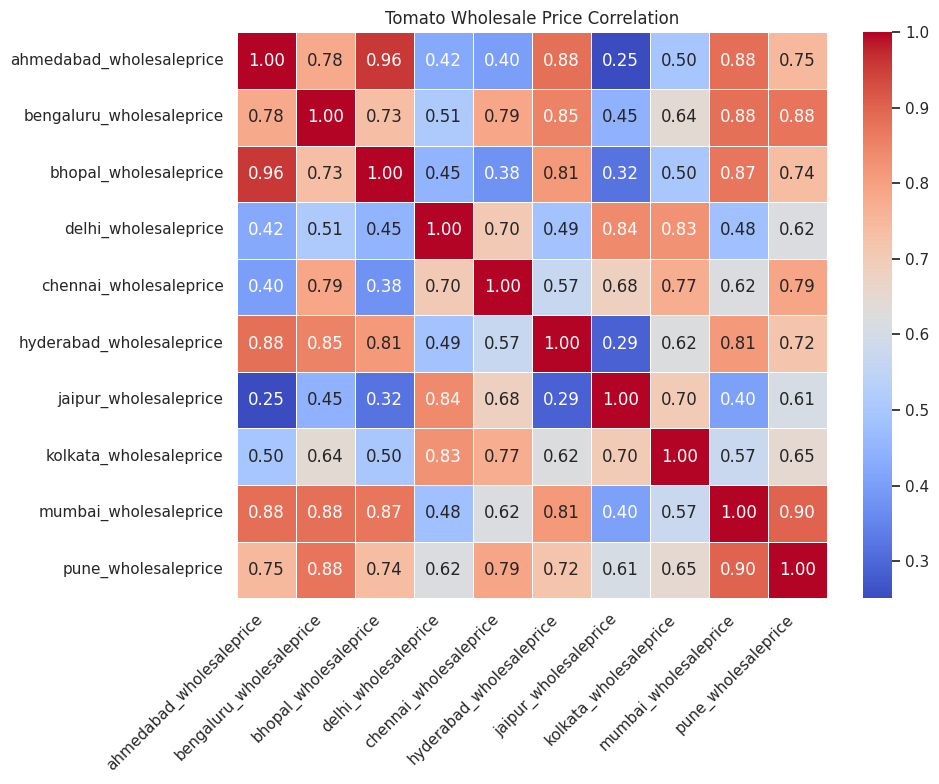

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Function to plot heatmap
def plot_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Extract wholesale price columns
potato_wholesale = potato[[col for col in potato.columns if '_wholesaleprice' in col]]
onion_wholesale = onion[[col for col in onion.columns if '_wholesaleprice' in col]]
tomato_wholesale = tomato[[col for col in tomato.columns if '_wholesaleprice' in col]]

# Plot heatmaps
plot_heatmap(potato_wholesale, "Potato Wholesale Price Correlation")
plot_heatmap(onion_wholesale, "Onion Wholesale Price Correlation")
plot_heatmap(tomato_wholesale, "Tomato Wholesale Price Correlation")


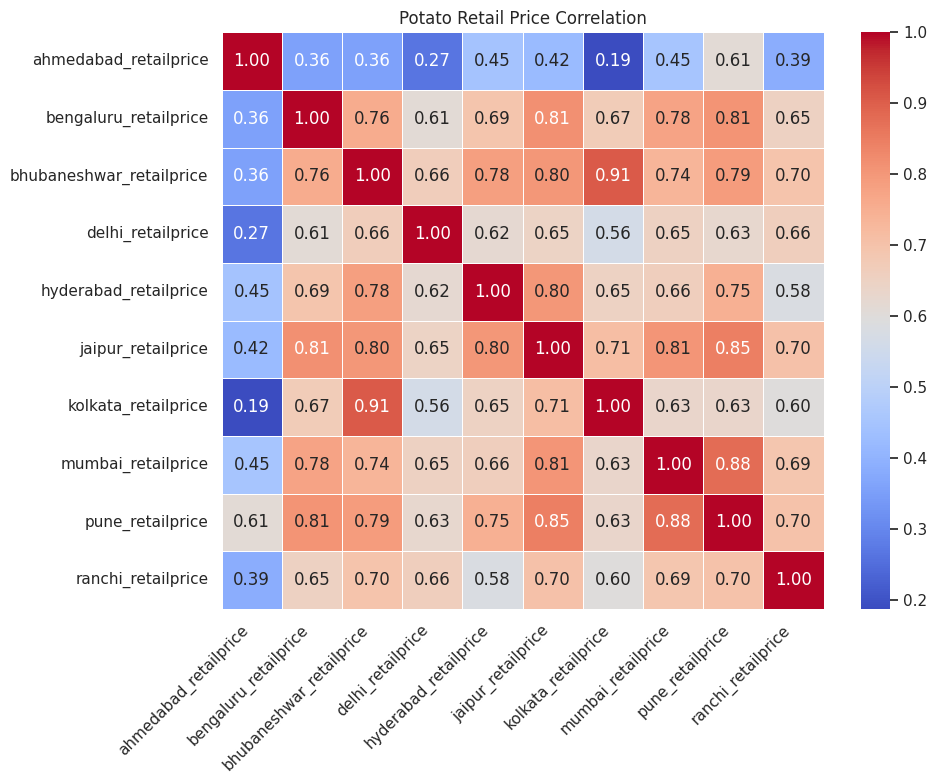

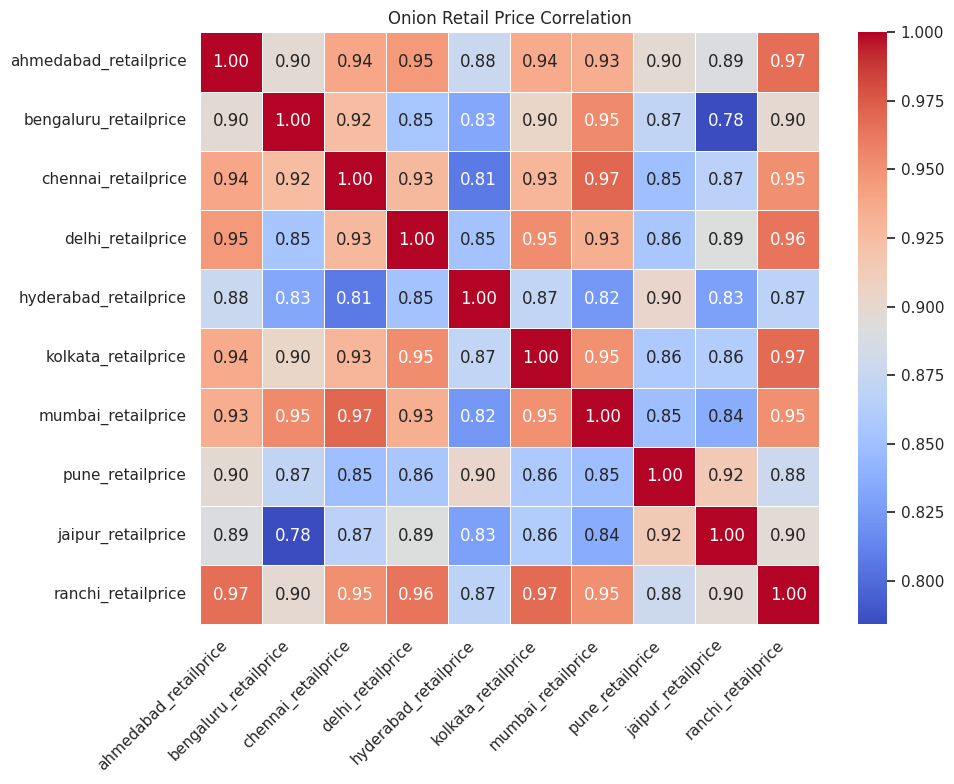

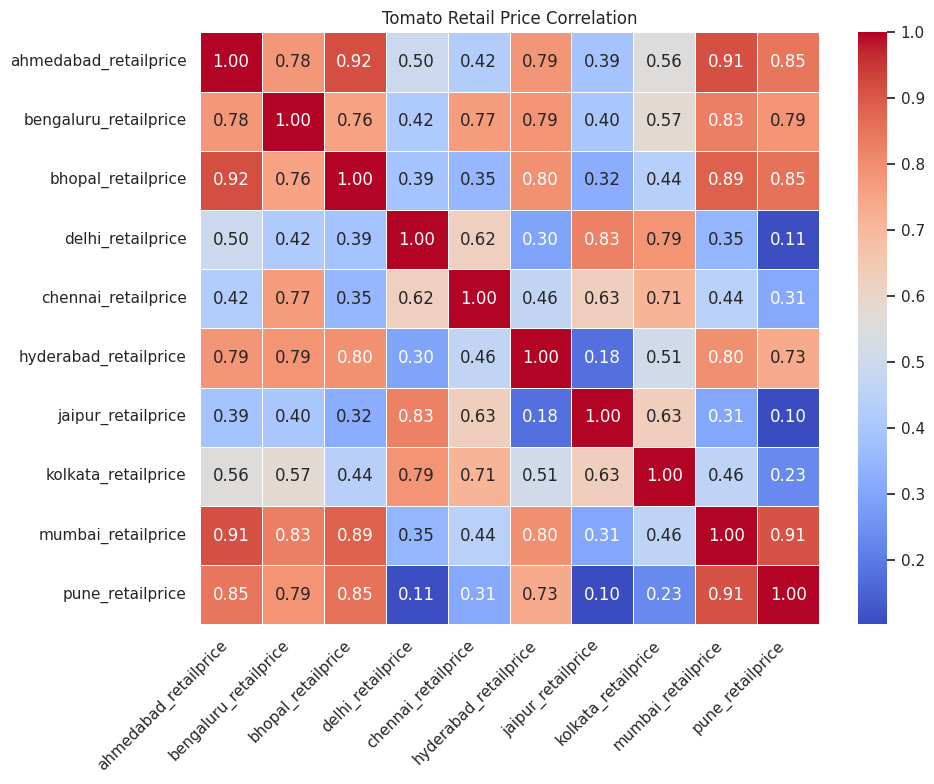

In [21]:
# Extract retail price columns
potato_retail = potato[[col for col in potato.columns if '_retailprice' in col]]
onion_retail = onion[[col for col in onion.columns if '_retailprice' in col]]
tomato_retail = tomato[[col for col in tomato.columns if '_retailprice' in col]]

# Plot heatmaps
plot_heatmap(potato_retail, "Potato Retail Price Correlation")
plot_heatmap(onion_retail, "Onion Retail Price Correlation")
plot_heatmap(tomato_retail, "Tomato Retail Price Correlation")

# **Trend Plots**

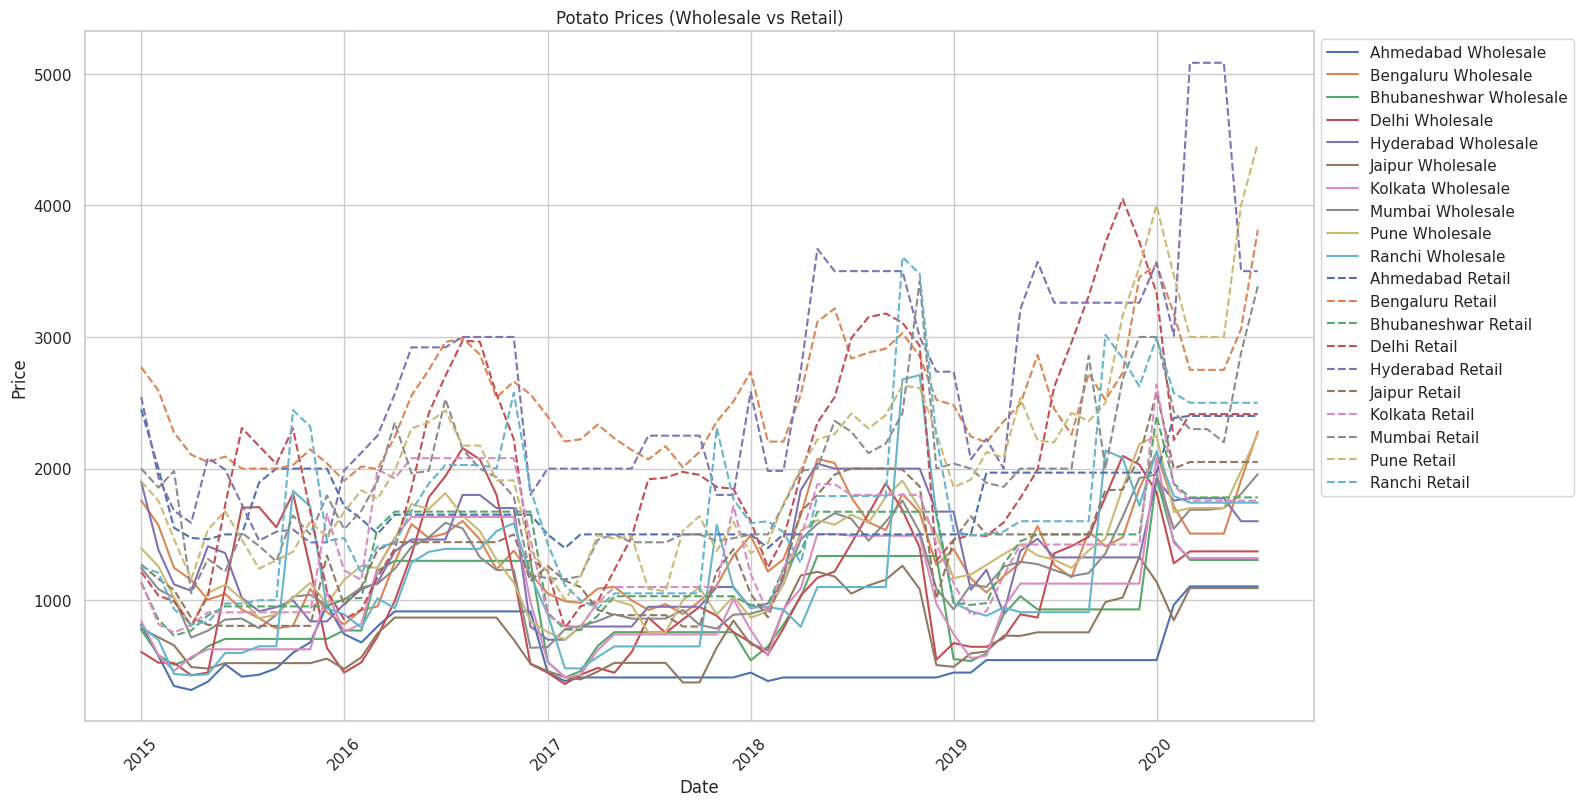

In [8]:
import matplotlib.pyplot as plt

# Example for Potato
cities = sorted(set(col.split('_')[0] for col in potato.columns if '_wholesaleprice' in col))

plt.figure(figsize=(16, 8))
for city in cities:
    plt.plot(potato['date'], potato[f'{city}_wholesaleprice'], label=f'{city.capitalize()} Wholesale')
for city in cities:
    plt.plot(potato['date'], potato[f'{city}_retailprice'], linestyle='--', label=f'{city.capitalize()} Retail')

plt.title('Potato Prices (Wholesale vs Retail)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# **EDA for Bengaluru Market**

 **Import Libraries and Load Data**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
potato = pd.read_excel("Potato_Cleaned.xlsx")
onion = pd.read_excel("Onion_cleaned.xlsx")
tomato = pd.read_excel("Tomato_Cleaned.xlsx")

# Standardize column names
for df in [potato, onion, tomato]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


**Convert Date and Filter Bengaluru Market**

In [10]:
columns = ['date', 'bengaluru_wholesaleprice', 'bengaluru_retailprice', 'bengaluru_volume', 'bengaluru_avg._temperature']

# Filter only available columns for each dataset
potato_blr = potato[[col for col in columns if col in potato.columns]]
onion_blr = onion[[col for col in columns if col in onion.columns]]
tomato_blr = tomato[[col for col in columns if col in tomato.columns]]


**Descriptive Statistics**

In [11]:
print(potato_blr.shape)
print(onion_blr.shape)
print(tomato_blr.shape)

(67, 5)
(67, 4)
(77, 5)


In [12]:
potato_blr.head()

,date,bengaluru_wholesaleprice,bengaluru_retailprice,bengaluru_volume,bengaluru_avg._temperature
0,2015-01-01,1758,2770,32806,20.8
1,2015-02-01,1569,2592,21241,22.9
2,2015-03-01,1246,2274,22587,25.5
3,2015-04-01,1153,2105,22022,27.1
4,2015-05-01,1004,2050,23161,26.9


In [13]:
onion_blr.head()

,date,bengaluru_wholesaleprice,bengaluru_retailprice,bengaluru_volume
0,2015-01-01,1758,2791,74978
1,2015-02-01,1815,2750,42164
2,2015-03-01,1576,2396,41339
3,2015-04-01,1455,2260,43534
4,2015-05-01,1725,2458,44227


In [14]:
tomato_blr.head()

,date,bengaluru_wholesaleprice,bengaluru_retailprice,bengaluru_volume,bengaluru_avg._temperature
0,2015-01-01,1295,1961,30762,20.8
1,2015-02-01,829,1392,11995,22.9
2,2015-03-01,776,1296,13511,25.5
3,2015-04-01,995,1640,8964,27.1
4,2015-05-01,2115,2888,11665,26.9


**Time Series Line Plots**

**Wholesale price**

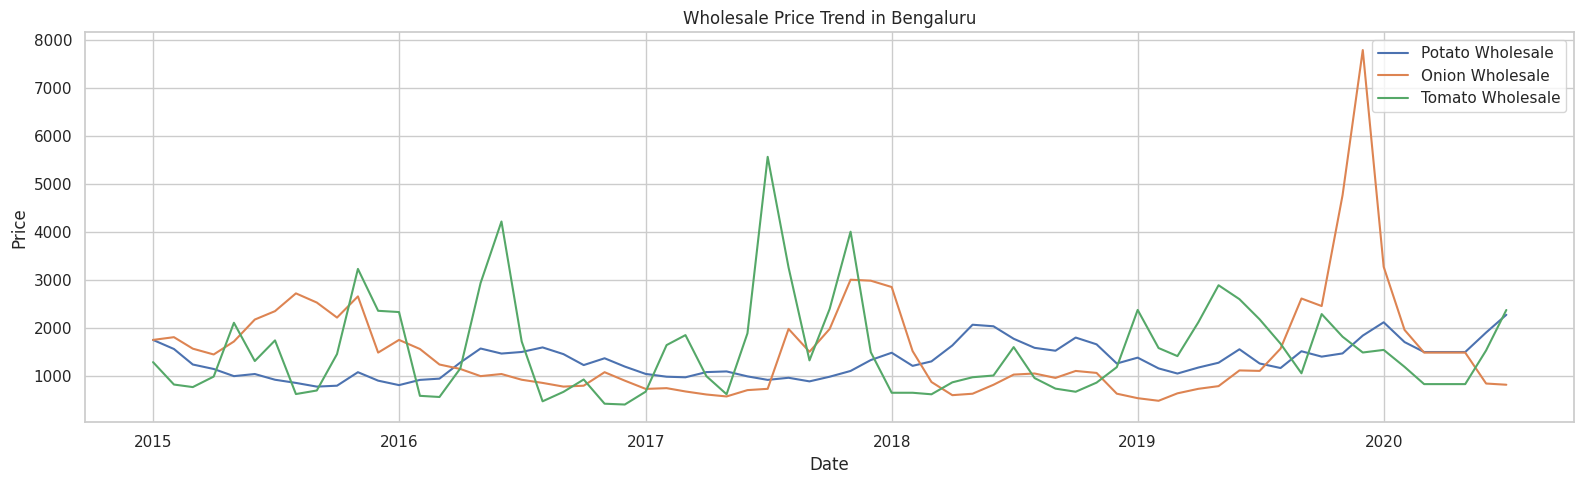

In [15]:
plt.figure(figsize=(16, 5))
plt.plot(potato_blr['date'], potato_blr['bengaluru_wholesaleprice'], label='Potato Wholesale')
plt.plot(onion_blr['date'], onion_blr['bengaluru_wholesaleprice'], label='Onion Wholesale')
plt.plot(tomato_blr['date'], tomato_blr['bengaluru_wholesaleprice'], label='Tomato Wholesale')
plt.title("Wholesale Price Trend in Bengaluru")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Retail price**

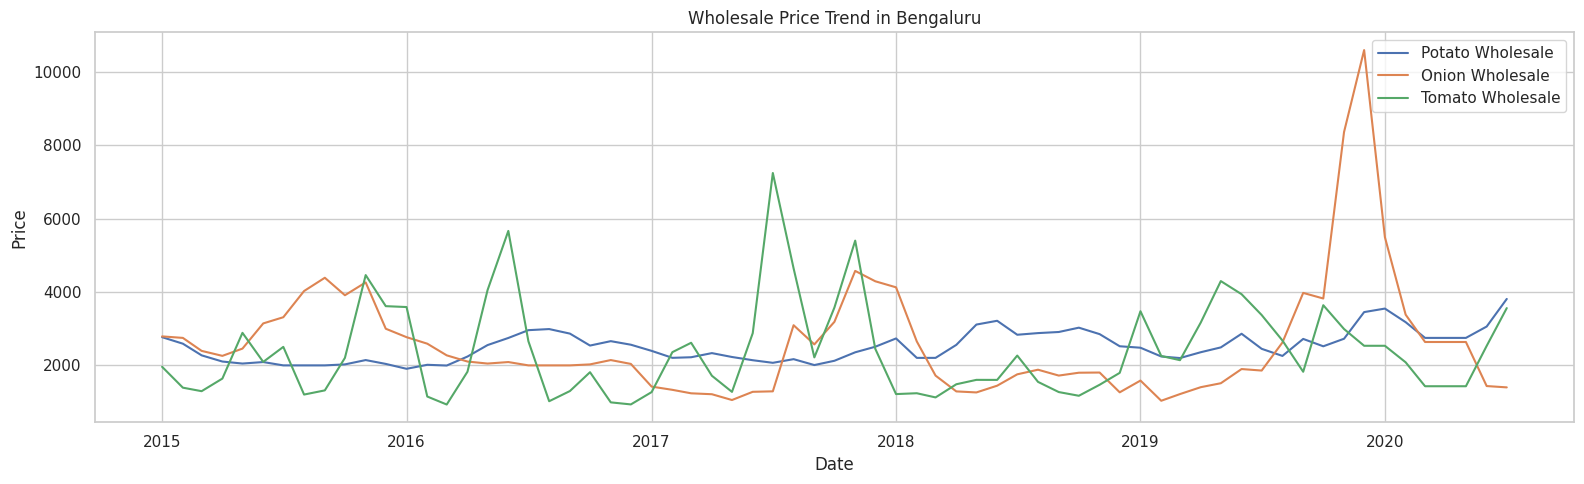

In [16]:
plt.figure(figsize=(16, 5))
plt.plot(potato_blr['date'], potato_blr['bengaluru_retailprice'], label='Potato Wholesale')
plt.plot(onion_blr['date'], onion_blr['bengaluru_retailprice'], label='Onion Wholesale')
plt.plot(tomato_blr['date'], tomato_blr['bengaluru_retailprice'], label='Tomato Wholesale')
plt.title("Wholesale Price Trend in Bengaluru")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Volume Trend Over Time**

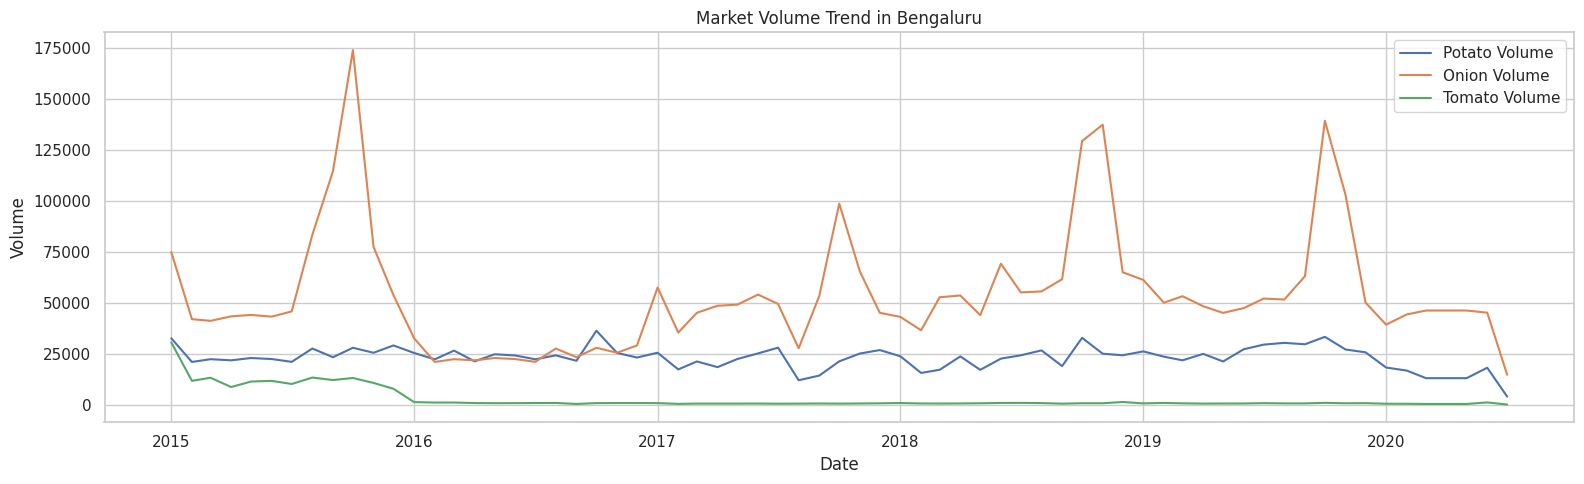

In [17]:
plt.figure(figsize=(16, 5))
plt.plot(potato_blr['date'], potato_blr['bengaluru_volume'], label='Potato Volume')
plt.plot(onion_blr['date'], onion_blr['bengaluru_volume'], label='Onion Volume')
plt.plot(tomato_blr['date'], tomato_blr['bengaluru_volume'], label='Tomato Volume')
plt.title("Market Volume Trend in Bengaluru")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Average Temperature Trend Over Time**

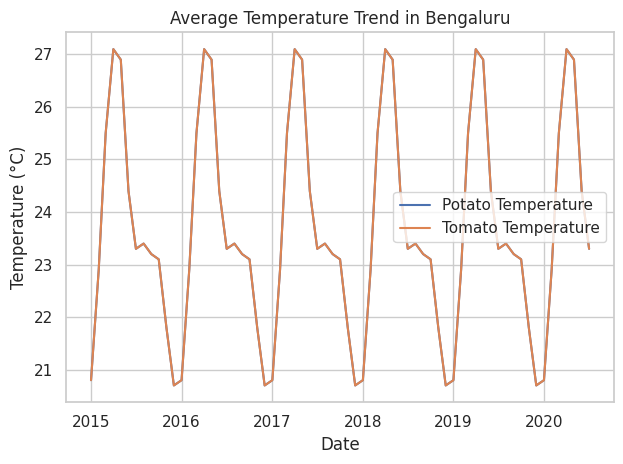

In [18]:
# Check if 'bengaluru_avg._temperature' exists before plotting
if 'bengaluru_avg._temperature' in potato_blr.columns:
    plt.plot(potato_blr['date'], potato_blr['bengaluru_avg._temperature'], label='Potato Temperature')
if 'bengaluru_avg._temperature' in onion_blr.columns:
    plt.plot(onion_blr['date'], onion_blr['bengaluru_avg._temperature'], label='Onion Temperature')
if 'bengaluru_avg._temperature' in tomato_blr.columns:
    plt.plot(tomato_blr['date'], tomato_blr['bengaluru_avg._temperature'], label='Tomato Temperature')

plt.title("Average Temperature Trend in Bengaluru")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Select Bengaluru data
bengaluru_potato = potato[['date', 'bengaluru_wholesaleprice', 'bengaluru_retailprice', 'bengaluru_volume', 'bengaluru_avg._temperature']].copy()
bengaluru_onion = onion[['date', 'bengaluru_wholesaleprice', 'bengaluru_retailprice', 'bengaluru_volume']].copy()
bengaluru_tomato = tomato[['date', 'bengaluru_wholesaleprice', 'bengaluru_retailprice', 'bengaluru_volume', 'bengaluru_avg._temperature']].copy()

# Save to CSV
bengaluru_potato.to_csv('bengaluru_potato.csv', index=False)
bengaluru_onion.to_csv('bengaluru_onion.csv', index=False)
bengaluru_tomato.to_csv('bengaluru_tomato.csv', index=False)

print("Bengaluru data saved to CSV files.")
print("bengaluru_potato.csv")
print("bengaluru_onion.csv")
print("bengaluru_tomato.csv")

Bengaluru data saved to CSV files.
bengaluru_potato.csv
bengaluru_onion.csv
bengaluru_tomato.csv


In [22]:
import pandas as pd

# --- 1. Load All Datasets ---
print("Loading datasets...")
potato_df = pd.read_csv('bengaluru_potato.csv')
rainfall_df = pd.read_csv('bengaluru_rainfall_2015_2020.csv')
diesel_df = pd.read_csv('bengaluru_diesel_prices.csv')
neighbor_df = pd.read_excel('Potato_Cleaned.xlsx')

# --- 2. Clean and Standardize Data ---
print("Cleaning and standardizing data...")

# Main potato data: Convert 'date' to datetime
potato_df['date'] = pd.to_datetime(potato_df['date'])

# Rainfall data: Convert 'date' to datetime
rainfall_df['date'] = pd.to_datetime(rainfall_df['date'])

# Diesel data: Convert 'Date' from 'dd-mm-yyyy' format, then rename columns
diesel_df['date'] = pd.to_datetime(diesel_df['Date'], format='%d-%m-%Y')
diesel_df = diesel_df.rename(columns={'Diesel Price (₹/litre)': 'diesel_price'})
diesel_df = diesel_df.drop(columns=['Date']) # Drop the original 'Date' column

# Neighboring regions data: Convert 'date' and select relevant columns
neighbor_df['date'] = pd.to_datetime(neighbor_df['date'])
# We will use Hyderabad and Pune wholesale prices as features
neighbor_prices_df = neighbor_df[['date', 'jaipur_retailprice', 'pune_retailprice']]

# --- 3. Merge the DataFrames ---
print("Merging data...")

# Start with the main Bengaluru potato data as the base
merged_df = potato_df.copy()

# Sequentially merge with the other dataframes using a 'left' merge
# This keeps all records from the original 'potato_df'
merged_df = pd.merge(merged_df, rainfall_df, on='date', how='left')
merged_df = pd.merge(merged_df, diesel_df, on='date', how='left')
merged_df = pd.merge(merged_df, neighbor_prices_df, on='date', how='left')

# --- 4. Handle Missing Values ---
# A simple forward-fill strategy can be used to handle any gaps after merging
merged_df = merged_df.fillna(method='ffill')
# Drop any rows that might still have missing values (e.g., at the very beginning)
merged_df = merged_df.dropna()

print("Merge complete!")

# --- 5. Save the Final Dataset ---
output_filename = 'merged_potato_data.csv'
merged_df.to_csv(output_filename, index=False)
print(f"Successfully saved the merged data to '{output_filename}'")

# Display the first few rows of the final dataset
print("\n--- Merged Dataset ---")
print(merged_df.head())

Loading datasets...
Cleaning and standardizing data...
Merging data...
Merge complete!
Successfully saved the merged data to 'merged_potato_data.csv'

--- Merged Dataset ---
        date  bengaluru_wholesaleprice  bengaluru_retailprice  \
0 2015-01-01                      1758                   2770   
1 2015-02-01                      1569                   2592   
2 2015-03-01                      1246                   2274   
3 2015-04-01                      1153                   2105   
4 2015-05-01                      1004                   2050   

   bengaluru_volume  bengaluru_avg._temperature  bengaluru_rainfall  \
0             32806                        20.8                 9.0   
1             21241                        22.9                 0.0   
2             22587                        25.5                37.7   
3             22022                        27.1               225.8   
4             23161                        26.9               178.4   

   diese

/tmp/ipython-input-22-868745084.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_df.fillna(method='ffill')
